# colormap

In [382]:
from numpy import *
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import matplotlib.cm as cm
from numpy import *
from numpy import random
from scipy import stats




xmin = -10
xmax = 20

n = 10000
data = concatenate((random.normal(-3.5,0.8,size=n//3),random.normal(5,5,size=n),random.normal(1,2,size=n),random.normal(8,2,size=n),random.normal(3,4,size=n)))

n = 3
data2 = concatenate((random.normal(-3.5,0.8,size=n//3),random.normal(5,5,size=n),random.normal(1,2,size=n),random.normal(8,2,size=n),random.normal(3,4,size=n)))



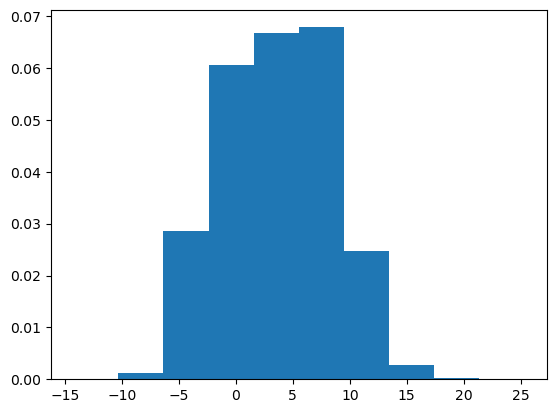

In [383]:
plt.style.use('default')

fig = plt.figure()
ax = fig.add_subplot()

plt.hist(data, density=True)

plt.savefig('../plots/Histogram.pdf',transparent=False,bbox_inches='tight')

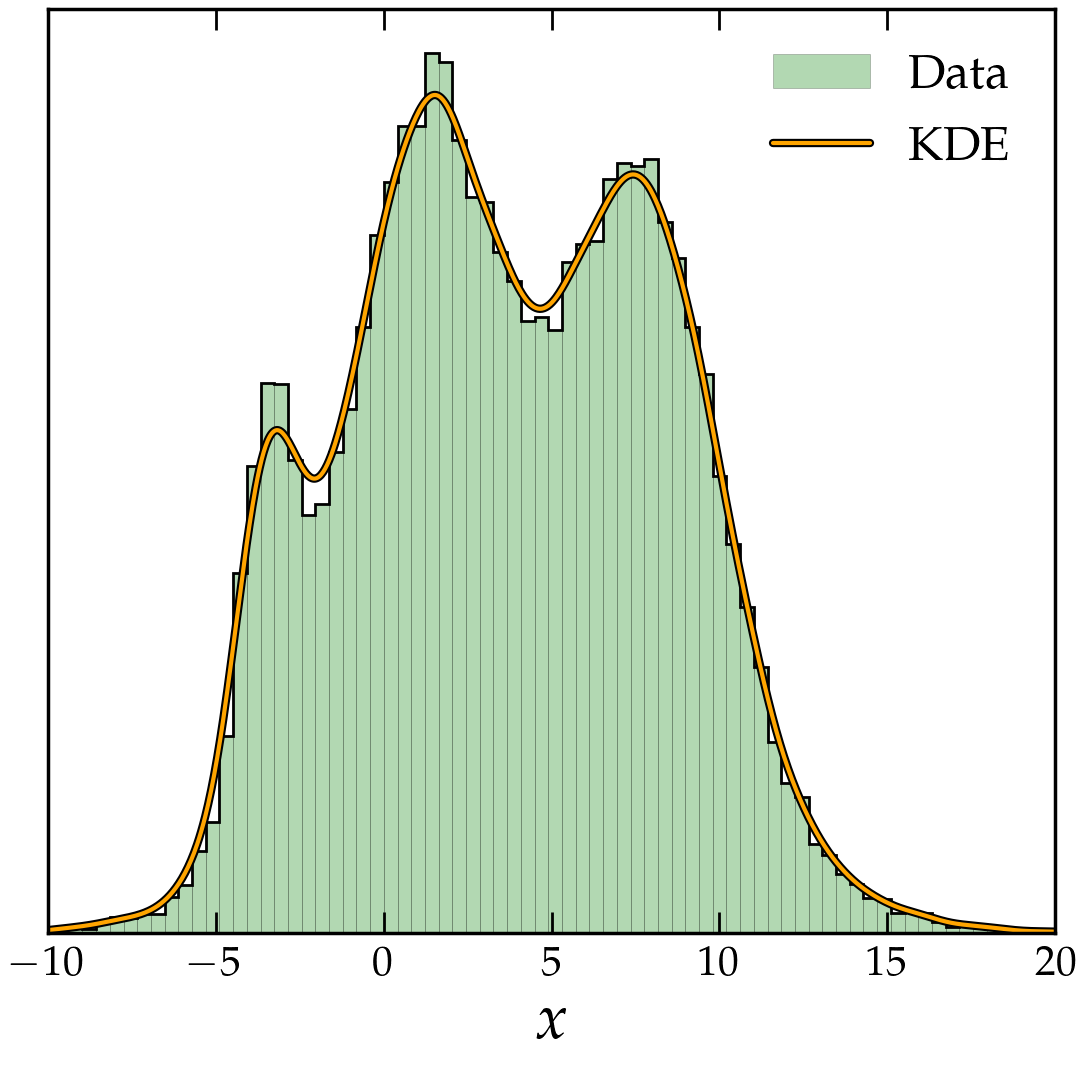

In [384]:
plt.style.use('sty.mplstyle')

fig = plt.figure()
ax = fig.add_subplot()
nbins = 100
bins = linspace(xmin,xmax,nbins)
plt.hist(data, density=True, bins='fd', color='green',alpha=0.3,edgecolor='black',lw=0.5,label='Data')
plt.hist(data, density=True, bins='fd', histtype='step',color='k',lw=2,alpha=1)

plt.yticks([])
plt.xlim([xmin,xmax])
plt.xlabel('$x$')

plt.savefig('../plots/Histogram_withoutKDE.pdf',transparent=False,bbox_inches='tight')

kde = stats.gaussian_kde(data)
xvals = linspace(xmin, xmax, 1000)
plt.plot(xvals, kde(xvals),'-',color='orange',path_effects=[pe.Stroke(linewidth=6, foreground='k'), pe.Normal()],label='KDE')

plt.legend(frameon=False)

plt.savefig('../plots/Histogram_withKDE.pdf',transparent=False,bbox_inches='tight')

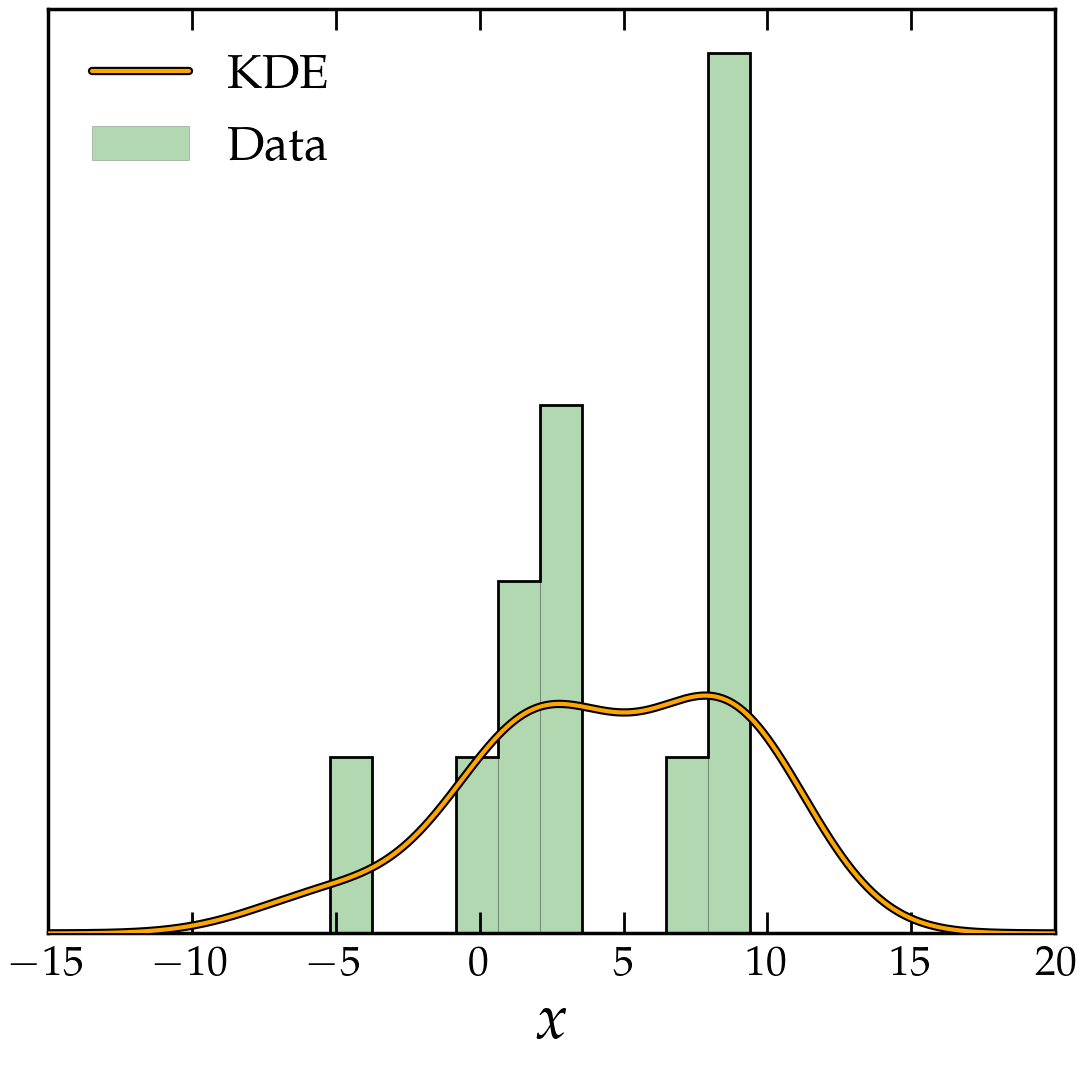

In [394]:
plt.style.use('sty.mplstyle')

fig = plt.figure()
ax = fig.add_subplot()
plt.yticks([])
xmin = -15
xmax= 20
plt.xlim([xmin,xmax])
plt.xlabel('$x$')

plt.hist(data2, density=True, bins=10, color='green',alpha=0,edgecolor='black',lw=0.5)
plt.hist(data2, density=True, bins=10, histtype='step',color='k',lw=2,alpha=0)

kde = stats.gaussian_kde(data2)
xvals = linspace(xmin, xmax, 1000)
plt.plot(xvals, kde(xvals),'-',color='orange',path_effects=[pe.Stroke(linewidth=6, foreground='k'), pe.Normal()],zorder=10,label='KDE')

leg = plt.legend(loc='upper left')

plt.savefig('../plots/Histogram_withKDE_Bad.pdf',transparent=False,bbox_inches='tight')


plt.hist(data2, density=True, bins=10, color='green',alpha=0.3,edgecolor='black',lw=0.5,label='Data')
plt.hist(data2, density=True, bins=10, histtype='step',color='k',lw=2,alpha=1)

del leg
leg = plt.legend(loc='upper left')


plt.savefig('../plots/Histogram_withKDE_Bad2.pdf',transparent=False,bbox_inches='tight')

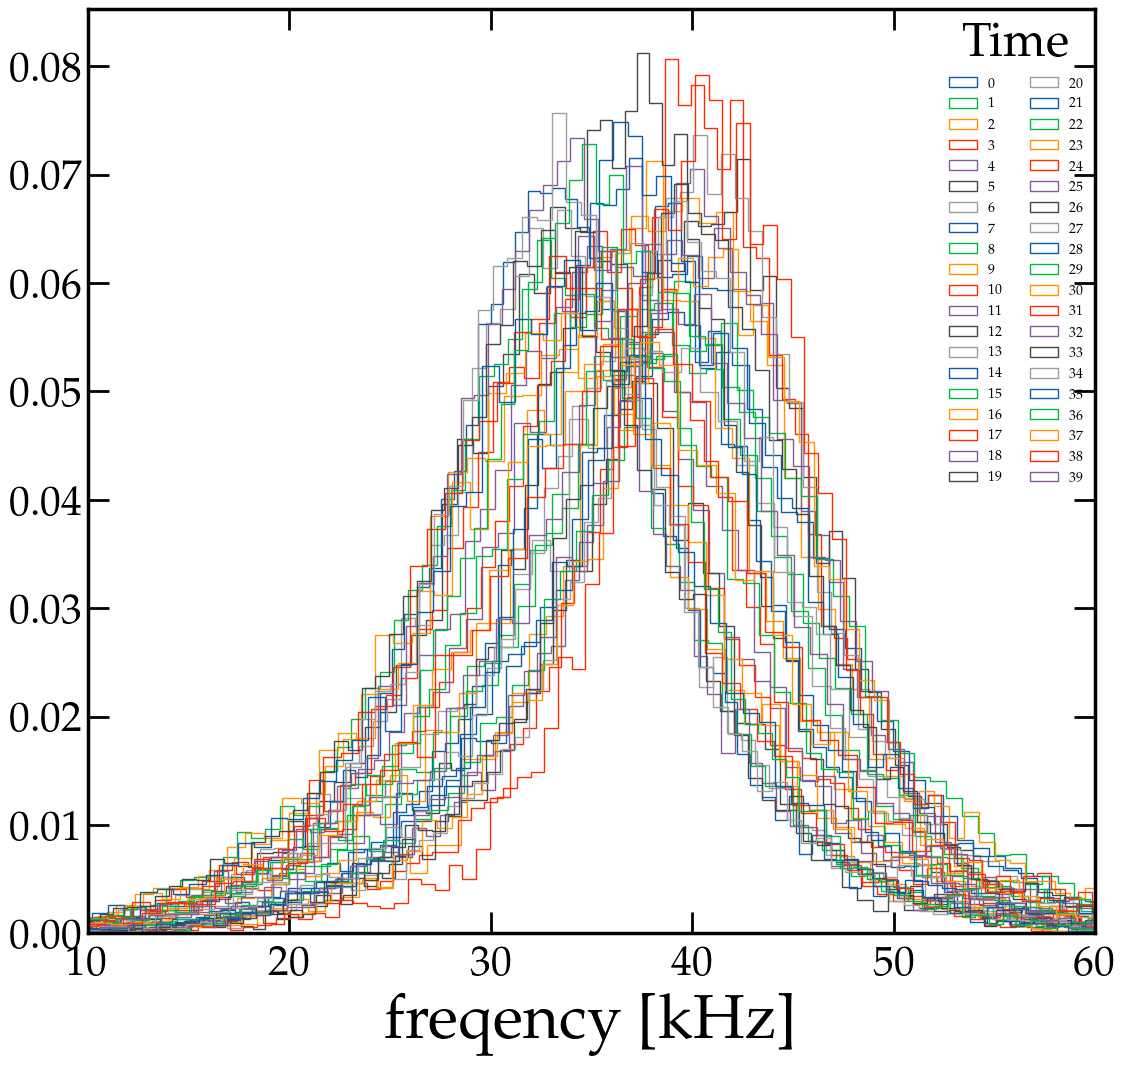

In [397]:
plt.style.use('sty.mplstyle')


n = 1000
nt = 40
t0 = arange(nt)
shift = sin(t0/3)*4 + 35

for i in range(nt):
    ni = random.choice([1,2,3,4],size=5)
    data = concatenate((random.normal(shift[i]+2,3.9,size=n*ni[0]),random.normal(shift[i]-2.3,9,size=n*ni[1]),random.normal(shift[i]+1.5,6,size=n*ni[2]),random.normal(shift[i]+3,5,size=n*ni[3]),random.normal(shift[i]+5,10,size=n*ni[4])))
    plt.hist(data,bins='fd',histtype='step',label=i,density=True)

plt.legend(ncol=2,fontsize=10,title='Time')
plt.xlim([10,60])
plt.xlabel('freqency [kHz]')

plt.savefig('../plots/Histograms_Bad.pdf',transparent=False,bbox_inches='tight')

# Ridgeline plot

Here's an example of how to make one. You can also fuss around with subplots to get it to work (see e.g. https://matplotlib.org/matplotblog/posts/create-ridgeplots-in-matplotlib/), but I think just scaling the heights of the histograms is much easier 

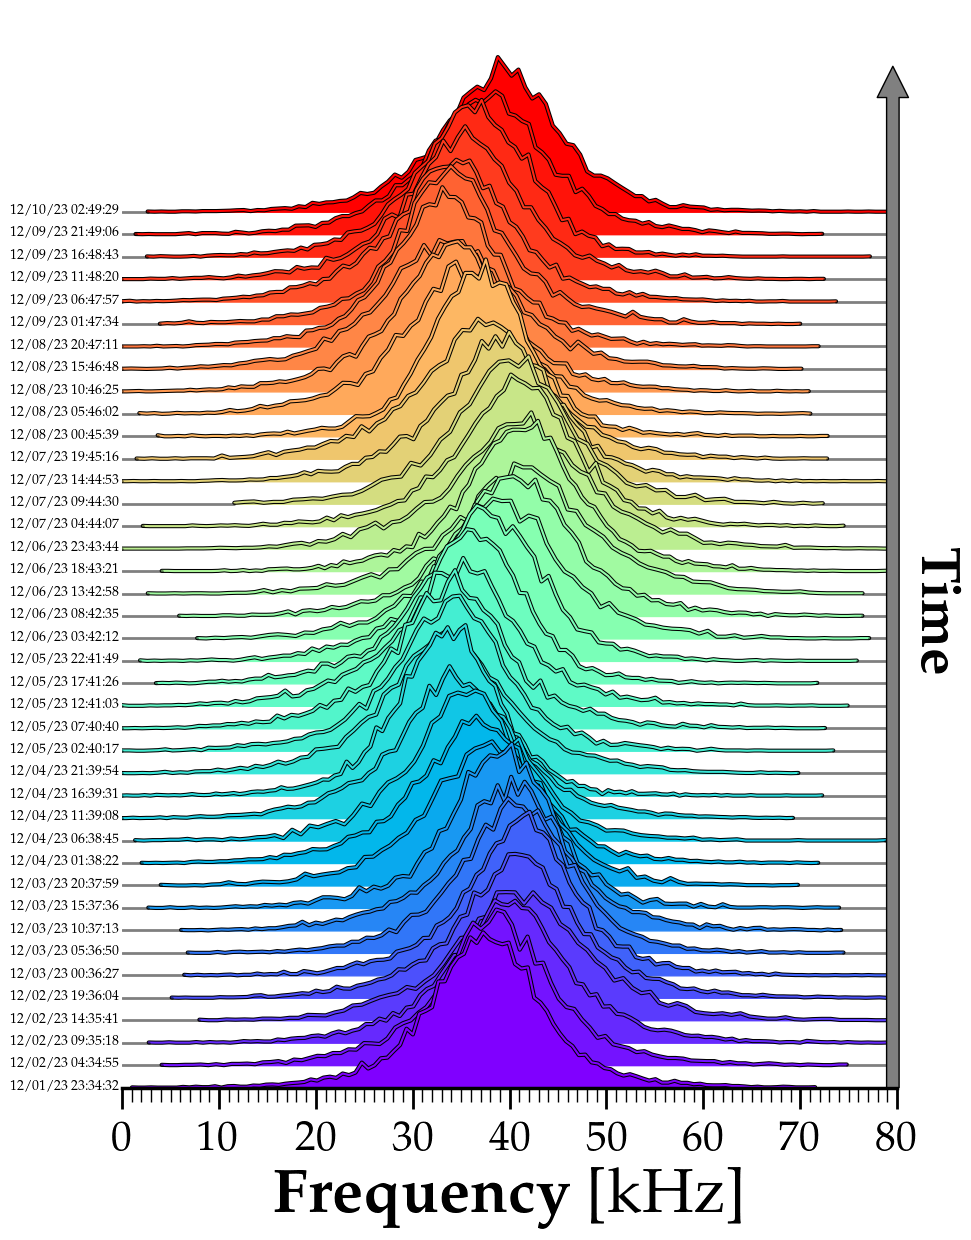

In [398]:
from matplotlib.ticker import MultipleLocator
import datetime

plt.style.use('sty.mplstyle')

fig = plt.figure(figsize=(10,14))
ax = fig.add_subplot()

xmin = 0
xmax = 80

y_scale = 100
cols = cm.rainbow(linspace(0,1,nt))
times = arange(datetime.datetime(2023,12,1,23,34,32), datetime.datetime(2023,12,11,2,0), datetime.timedelta(hours=5.0,seconds=23)).astype(datetime.datetime)

for i in range(nt):
    ni = random.choice([1,2,3,4],size=5)
    data = concatenate((random.normal(shift[i]+2,3.9,size=n*ni[0]),random.normal(shift[i]-2.3,9,size=n*ni[1]),random.normal(shift[i]+1.5,6,size=n*ni[2]),random.normal(shift[i]+3,5,size=n*ni[3]),random.normal(shift[i]+5,10,size=n*ni[4])))
    h,xe = histogram(data,bins='fd',density=True)
    plt.fill_between(xe[1:],y_scale*h + i,y2=i,zorder=-i,color=cols[i,:],alpha=1)
    plt.plot(xe[1:],y_scale*h + i,lw=1.5,zorder=-i,color=cols[i,:],path_effects=[pe.Stroke(linewidth=3, foreground='k'), pe.Normal()])
    plt.plot([xmin,xe[1]],[i,i],'k-',zorder=-i,lw=2,alpha=0.5)
    plt.plot([xe[-1],xmax],[i,i],'k-',zorder=-i,lw=2,alpha=0.5)

    plt.text(xmin-0.2,i+0.03,times[i].strftime("%D %H:%M:%S"),ha='right',fontsize=10,va='center')


plt.xlim([0,80])
plt.ylim(bottom=0,top=48)


ax.tick_params(which='both',tickdir='out',top=False,right=False)

ax.set_yticks([])
ax.set_yticklabels([])

ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.xaxis.set_major_locator(MultipleLocator(10))

plt.xlabel(r'{\bf Frequency} [kHz]')
ax.spines['top'].set_alpha(0) 
ax.spines['left'].set_alpha(0) 
ax.spines['right'].set_alpha(0)

ax.annotate('', xy=(1.0-0.0055, 0.95), xycoords='axes fraction', xytext=(1.0-0.0055, -0.0025), 
            arrowprops=dict(arrowstyle="simple",facecolor='gray'),clip_on = False,size=45)
plt.gcf().text(0.925,0.45,r'{\bf Time}',rotation=-90,rotation_mode='anchor',fontsize=40,ha='center')


plt.savefig('../plots/Histograms_Good.pdf',transparent=False,bbox_inches='tight')
plt.savefig('../plots/plots_png/Histograms_Good.png',transparent=False,bbox_inches='tight')

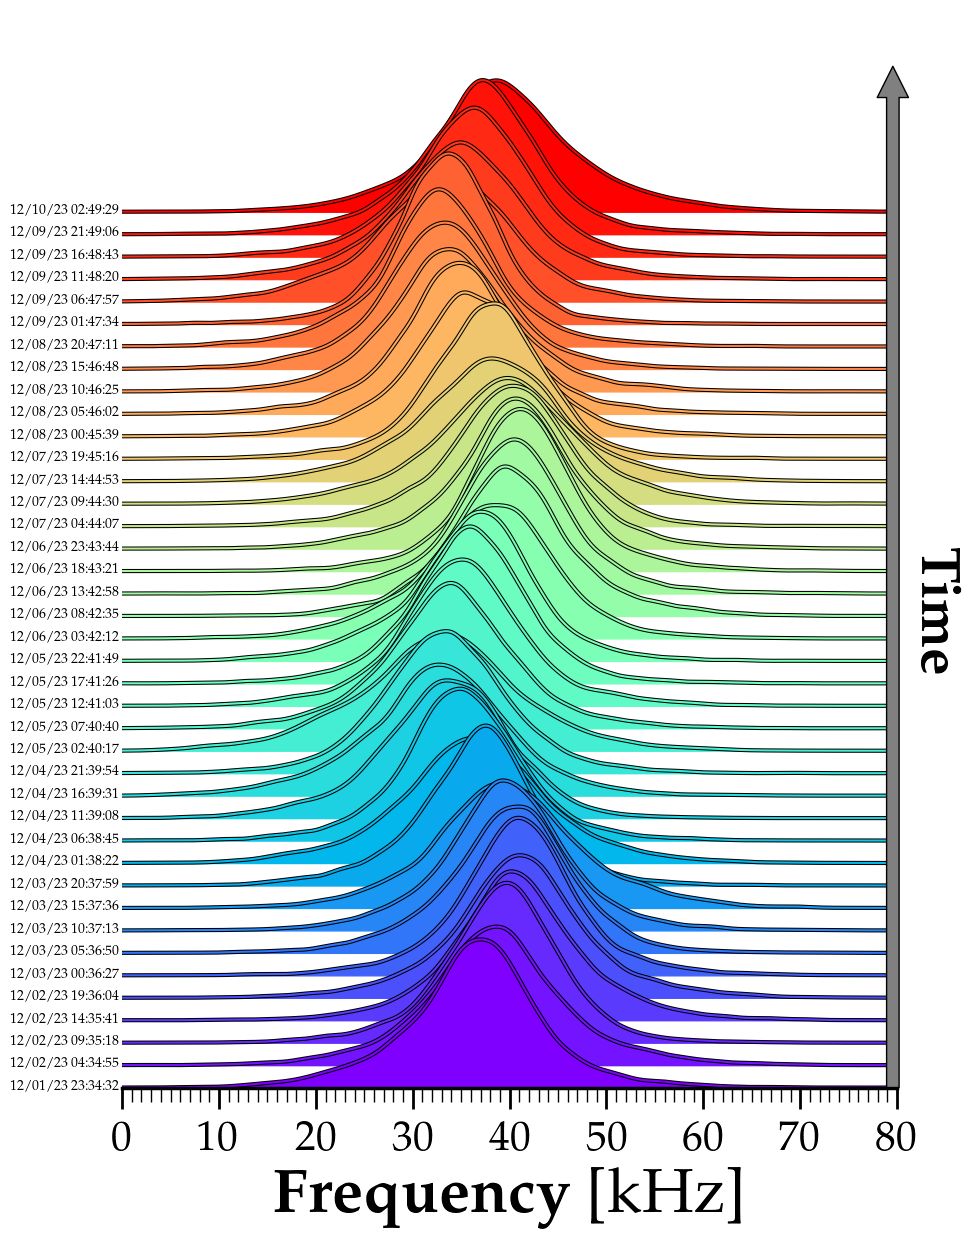

In [399]:
from matplotlib.ticker import MultipleLocator
import datetime

plt.style.use('sty.mplstyle')

fig = plt.figure(figsize=(10,14))
ax = fig.add_subplot()

xmin = 0
xmax = 80

y_scale = 100
cols = cm.rainbow(linspace(0,1,nt))
times = arange(datetime.datetime(2023,12,1,23,34,32), datetime.datetime(2023,12,11,2,0), datetime.timedelta(hours=5.0,seconds=23)).astype(datetime.datetime)

for i in range(nt):
    ni = random.choice([1,2,3,4],size=5)
    data = concatenate((random.normal(shift[i]+2,3.9,size=n*ni[0]),random.normal(shift[i]-2.3,9,size=n*ni[1]),random.normal(shift[i]+1.5,6,size=n*ni[2]),random.normal(shift[i]+3,5,size=n*ni[3]),random.normal(shift[i]+5,10,size=n*ni[4])))

    kde = stats.gaussian_kde(data)
    xe = linspace(xmin, xmax, 1000)
    h = kde(xe)
    plt.fill_between(xe,y_scale*h + i,y2=i,zorder=-i,color=cols[i,:],alpha=1)
    plt.plot(xe,y_scale*h + i,lw=1.5,zorder=-i,color=cols[i,:],path_effects=[pe.Stroke(linewidth=3, foreground='k'), pe.Normal()])
    plt.plot([xmin,xe[0]],[i,i],'k-',zorder=-i,lw=2,alpha=0.5)
    plt.plot([xe[-1],xmax],[i,i],'k-',zorder=-i,lw=2,alpha=0.5)

    plt.text(xmin-0.2,i+0.03,times[i].strftime("%D %H:%M:%S"),ha='right',fontsize=10,va='center')


plt.xlim([0,80])
plt.ylim(bottom=0,top=48)


ax.tick_params(which='both',tickdir='out',top=False,right=False)

ax.set_yticks([])
ax.set_yticklabels([])

ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.xaxis.set_major_locator(MultipleLocator(10))

plt.xlabel(r'{\bf Frequency} [kHz]')
ax.spines['top'].set_alpha(0) 
ax.spines['left'].set_alpha(0) 
ax.spines['right'].set_alpha(0)

ax.annotate('', xy=(1.0-0.0055, 0.95), xycoords='axes fraction', xytext=(1.0-0.0055, -0.0025), 
            arrowprops=dict(arrowstyle="simple",facecolor='gray'),clip_on = False,size=45)
plt.gcf().text(0.925,0.45,r'{\bf Time}',rotation=-90,rotation_mode='anchor',fontsize=40,ha='center')


plt.savefig('../plots/Histograms_Good_withKDE.pdf',transparent=False,bbox_inches='tight')
plt.savefig('../plots/plots_png/Histograms_Good_withKDE.png',transparent=False,bbox_inches='tight')